## IMDB Cleaning (Trase, Mark, Karl Durant)

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
tips = sns.load_dataset('tips')
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
conn = sqlite3.connect('../../zippedData/im (2).db')

In [3]:
pd.read_sql("""
SELECT *
FROM movie_basics

""", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [4]:
pd.read_sql("""
SELECT MOVIE_ID AS Movie_ID, AVERAGERATING AS Avg_Rating, NUMVOTES AS Number_of_Votes, PRIMARY_TITLE AS Title, START_YEAR AS Year, RUNTIME_MINUTES AS Minutes, GENRES AS Genres
FROM MOVIE_RATINGS
JOIN MOVIE_BASICS
    USING(MOVIE_ID)
WHERE NUMVOTES > 15000
ORDER BY NUMVOTES DESC
;
""", conn).head()

,Movie_ID,Avg_Rating,Number_of_Votes,Title,Year,Minutes,Genres
0,tt1375666,8.8,1841066,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
1,tt1345836,8.4,1387769,The Dark Knight Rises,2012,164.0,"Action,Thriller"
2,tt0816692,8.6,1299334,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
3,tt1853728,8.4,1211405,Django Unchained,2012,165.0,"Drama,Western"
4,tt0848228,8.1,1183655,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"


In [5]:
pd.read_sql("""
SELECT MOVIE_ID AS Movie_ID, AVERAGERATING AS Avg_Rating, NUMVOTES AS Number_of_Votes, PERSON_ID AS Person_ID, CATEGORY AS Profession
FROM MOVIE_RATINGS
JOIN PRINCIPALS
    USING(MOVIE_ID)
WHERE NUMVOTES > 15000
ORDER BY NUMVOTES DESC
;
""", conn)

,Movie_ID,Avg_Rating,Number_of_Votes,Person_ID,Profession
0,tt1375666,8.8,1841066,nm0000138,actor
1,tt1375666,8.8,1841066,nm0001877,composer
2,tt1375666,8.8,1841066,nm0002892,cinematographer
3,tt1375666,8.8,1841066,nm0245596,production_designer
4,tt1375666,8.8,1841066,nm0330687,actor
...,...,...,...,...,...
21491,tt1434435,6.3,15012,nm0500329,writer
21492,tt1434435,6.3,15012,nm0711840,producer
21493,tt1434435,6.3,15012,nm0764552,producer
21494,tt1434435,6.3,15012,nm1135423,director


In [6]:
pd.read_sql("""
SELECT MOVIE_ID AS Movie_ID, PERSON_ID AS Person_ID, CATEGORY AS Profession, PRIMARY_NAME AS Name
FROM PERSONS
JOIN PRINCIPALS
    USING(PERSON_ID)
;
""", conn)

,Movie_ID,Person_ID,Profession,Name
0,tt2398241,nm0061671,producer,Mary Ellen Bauder
1,tt0433397,nm0061865,composer,Joseph Bauer
2,tt1681372,nm0061865,composer,Joseph Bauer
3,tt2281215,nm0061865,composer,Joseph Bauer
4,tt2387710,nm0061865,composer,Joseph Bauer
...,...,...,...,...
1027907,tt6527982,nm9990381,actress,Susan Grobes
1027908,tt8737130,nm9990690,actress,Joo Yeon So
1027909,tt8734436,nm9991320,actress,Madeline Smith
1027910,tt8739240,nm9991786,producer,Michelle Modigliani


In [7]:
imdb_important_data = pd.read_sql("""
SELECT Distinct primary_title as Title, averagerating as IMDB_Rating, runtime_minutes as Runtime, start_year as Year, genres as Genres
FROM MOVIE_RATINGS
JOIN MOVIE_BASICS
    USING(MOVIE_ID)
JOIN MOVIE_AKAS
    USING(MOVIE_ID)
WHERE numvotes > 5000 and region == "US"
ORDER BY averagerating DESC
;
""", conn)

In [8]:
imdb_important_data

,Title,IMDB_Rating,Runtime,Year,Genres
0,Once Upon a Time ... in Hollywood,9.7,159.0,2019,"Comedy,Drama"
1,Peranbu,9.4,147.0,2018,Drama
2,Wheels,9.3,115.0,2014,Drama
3,O.J.: Made in America,8.9,467.0,2016,"Biography,Crime,Documentary"
4,Inception,8.8,148.0,2010,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
2764,Himmatwala,1.7,150.0,2013,"Action,Comedy,Drama"
2765,Justin Bieber: Never Say Never,1.6,105.0,2011,"Documentary,Music"
2766,Code Name: K.O.Z.,1.5,114.0,2015,"Crime,Mystery"
2767,Saving Christmas,1.5,79.0,2014,"Comedy,Family"


In [9]:
imdb_clean_table = pd.read_sql("""
SELECT DISTINCT PRIMARY_TITLE AS Title, AVERAGERATING AS Rating, START_YEAR AS Year, RUNTIME_MINUTES AS Runtime, GENRES AS Genres
FROM MOVIE_RATINGS
JOIN MOVIE_BASICS
    USING(MOVIE_ID)
JOIN MOVIE_AKAS
    USING(MOVIE_ID)
WHERE numvotes > 5000
ORDER BY averagerating DESC
;
""", conn)

imdb_clean_table

,Title,Rating,Year,Runtime,Genres
0,Once Upon a Time ... in Hollywood,9.7,2019,159.0,"Comedy,Drama"
1,Aloko Udapadi,9.5,2017,113.0,"Drama,History"
2,Peranbu,9.4,2018,147.0,Drama
3,The Mountain II,9.3,2016,135.0,"Action,Drama,War"
4,Aynabaji,9.3,2016,147.0,"Crime,Mystery,Thriller"
...,...,...,...,...,...
3913,Saving Christmas,1.5,2014,79.0,"Comedy,Family"
3914,Code Name: K.O.Z.,1.5,2015,114.0,"Crime,Mystery"
3915,Smolensk,1.4,2016,120.0,"Drama,Thriller"
3916,Potato Salad,1.3,2015,81.0,"Comedy,Horror"


## TMDB x Movie Gross (Trase, Karl, and Mark)

In [10]:
movie_gross_df = pd.read_csv('../../zippedData/bom.movie_gross.csv.gz')

In [11]:
tmdb_df = pd.read_csv('../../zippedData/tmdb.movies.csv.gz')

In [12]:
movie_budgets_df = pd.read_csv('../../zippedData/tn.movie_budgets.csv.gz')

In [13]:
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace(',', '').str.replace('$', '').astype('float')
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype('float')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype('float')

In [14]:
# Calculate the profit and add it as a new column to the movie budgets dataframe
movie_budgets_df['profit'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']

# Sort the dataframe by the profit column in descending order to see the most successful movies
most_profitable_movies = movie_budgets_df.sort_values('profit', ascending=False)

In [15]:
merged_df = movie_gross_df.merge(movie_budgets_df, how='right', left_on='title', right_on='movie')


In [16]:
merged_tmdb_budget = movie_budgets_df.merge(tmdb_df, how='inner', left_on='movie', right_on='title')

In [17]:
new_merged = merged_tmdb_budget.drop(['original_title'], axis=1)

In [18]:
karl_carolyn_merge = new_merged.drop(['id_x','release_date_x','genre_ids','id_y','Unnamed: 0'], axis=1)

In [19]:
# Creating Quarter Column
karl_carolyn_merge['release_date_y'] = pd.to_datetime(karl_carolyn_merge['release_date_y'])

karl_carolyn_merge['Quarter'] = karl_carolyn_merge['release_date_y'].dt.to_period('Q')


In [20]:
karl_carolyn_merge.rename(columns = {'movie':'Title'},inplace = True)

In [21]:
karl_carolyn_merge.rename(columns = {'profit':'Profit'},inplace = True)

In [22]:
karl_carolyn_merge.rename(columns = {'release_date_y':'Release_Date'},inplace = True)


In [23]:
karl_carolyn_merge.rename(columns = {'production_budget':'Production_Budget'},inplace = True)

In [24]:
karl_carolyn_merge.rename(columns = {'domestic_gross':'Domestic_Gross'},inplace = True)

In [25]:
karl_carolyn_merge.rename(columns = {'worldwide_gross':'Worldwide_Gross'},inplace = True)

In [26]:
karl_carolyn_merge.rename(columns = {'original_language':'Original_Language'},inplace = True)

In [27]:
karl_carolyn_merge.rename(columns = {'popularity':'Popularity'},inplace = True)

In [28]:
karl_carolyn_merge.rename(columns = {'vote_average':'TMDB_Rating'},inplace = True)

In [29]:
karl_carolyn_merge.rename(columns = {'vote_count':'Vote_Count'},inplace = True)

In [30]:
karl_carolyn_merge = karl_carolyn_merge.drop(['title'], axis=1)
karl_carolyn_merge

,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,Release_Date,TMDB_Rating,Vote_Count,Quarter
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,en,26.526,2009-12-18,7.4,18676,2009Q4
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,en,30.579,2011-05-20,6.4,8571,2011Q2
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,en,44.383,2015-05-01,7.3,13457,2015Q2
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,en,80.773,2018-04-27,8.3,13948,2018Q2
4,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,en,34.953,2017-11-17,6.2,7510,2017Q4
...,...,...,...,...,...,...,...,...,...,...,...
2380,Exeter,25000.0,0.0,4.897920e+05,4.647920e+05,en,5.934,2015-03-26,4.7,121,2015Q1
2381,Ten,25000.0,0.0,0.000000e+00,-2.500000e+04,en,1.575,2014-03-28,5.4,5,2014Q1
2382,Dry Spell,22000.0,0.0,0.000000e+00,-2.200000e+04,en,0.600,2013-02-14,6.0,1,2013Q1
2383,All Superheroes Must Die,20000.0,0.0,0.000000e+00,-2.000000e+04,en,2.078,2013-01-04,3.9,19,2013Q1


## Quarter Column & Cleaning (Trase, Karl, Mark, Al Ameen, Carolyn)

In [31]:
# Created new column with Quarter column values as a string
karl_carolyn_merge['Q'] = karl_carolyn_merge['Quarter'].astype(str)
karl_carolyn_merge['Q']

0       2009Q4
1       2011Q2
2       2015Q2
3       2018Q2
4       2017Q4
         ...  
2380    2015Q1
2381    2014Q1
2382    2013Q1
2383    2013Q1
2384    2011Q4
Name: Q, Length: 2385, dtype: object

In [32]:
# Creating a quarter of year column
karl_carolyn_merge['s'] = karl_carolyn_merge['Q'].map( lambda x: x[-1:])
karl_carolyn_merge['s']

0       4
1       2
2       2
3       2
4       4
       ..
2380    1
2381    1
2382    1
2383    1
2384    4
Name: s, Length: 2385, dtype: object

In [33]:
karl_carolyn_merge['Vote_Count'].unique

<bound method Series.unique of 0       18676
1        8571
2       13457
3       13948
4        7510
        ...  
2380      121
2381        5
2382        1
2383       19
2384        7
Name: Vote_Count, Length: 2385, dtype: int64>

In [34]:
karl_carolyn_merge2 = karl_carolyn_merge

In [35]:
# Drops rows with less than 5 votes for ratings
karl_carolyn_merge2.drop(karl_carolyn_merge2[karl_carolyn_merge2.Vote_Count < 5].index, inplace=True)

In [36]:
#karl_carolyn_merge2 = karl_carolyn_merge2.drop(['Quarter'], axis=1)
karl_carolyn_merge2

,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,Release_Date,TMDB_Rating,Vote_Count,Quarter,Q,s
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,en,26.526,2009-12-18,7.4,18676,2009Q4,2009Q4,4
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,en,30.579,2011-05-20,6.4,8571,2011Q2,2011Q2,2
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,en,44.383,2015-05-01,7.3,13457,2015Q2,2015Q2,2
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,en,80.773,2018-04-27,8.3,13948,2018Q2,2018Q2,2
4,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,en,34.953,2017-11-17,6.2,7510,2017Q4,2017Q4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,Krisha,30000.0,144822.0,1.448220e+05,1.148220e+05,en,5.288,2016-03-18,6.8,86,2016Q1,2016Q1,1
2380,Exeter,25000.0,0.0,4.897920e+05,4.647920e+05,en,5.934,2015-03-26,4.7,121,2015Q1,2015Q1,1
2381,Ten,25000.0,0.0,0.000000e+00,-2.500000e+04,en,1.575,2014-03-28,5.4,5,2014Q1,2014Q1,1
2383,All Superheroes Must Die,20000.0,0.0,0.000000e+00,-2.000000e+04,en,2.078,2013-01-04,3.9,19,2013Q1,2013Q1,1


In [37]:
# Renaming Column
karl_carolyn_merge2.rename(columns = {'s':'Quarter_Num'},inplace = True)

In [38]:
#Creating Year Column
karl_carolyn_merge2['Year'] = karl_carolyn_merge2['Q'].map( lambda x: x[:4])

In [39]:
# Dropping Column Q
karl_carolyn_merge2 = karl_carolyn_merge2.drop(['Q'], axis=1)


In [40]:
karl_carolyn_merge2 = karl_carolyn_merge2.drop(['Quarter'], axis=1)

In [41]:
# Dropping Release Date
karl_carolyn_merge2 = karl_carolyn_merge2.drop(['Release_Date'], axis=1)
karl_carolyn_merge2

,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,TMDB_Rating,Vote_Count,Quarter_Num,Year
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,en,26.526,7.4,18676,4,2009
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,en,30.579,6.4,8571,2,2011
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,en,44.383,7.3,13457,2,2015
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,en,80.773,8.3,13948,2,2018
4,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,en,34.953,6.2,7510,4,2017
...,...,...,...,...,...,...,...,...,...,...,...
2378,Krisha,30000.0,144822.0,1.448220e+05,1.148220e+05,en,5.288,6.8,86,1,2016
2380,Exeter,25000.0,0.0,4.897920e+05,4.647920e+05,en,5.934,4.7,121,1,2015
2381,Ten,25000.0,0.0,0.000000e+00,-2.500000e+04,en,1.575,5.4,5,1,2014
2383,All Superheroes Must Die,20000.0,0.0,0.000000e+00,-2.000000e+04,en,2.078,3.9,19,1,2013


## Final Dataset (Trase) 

In [42]:
# Merging karl_carolyn_merge2 with imdb_clean_table

final_dataset = karl_carolyn_merge2.merge(imdb_clean_table, how='left', left_on='Title', right_on='Title')
final_dataset

,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,TMDB_Rating,Vote_Count,Quarter_Num,Year_x,Rating,Year_y,Runtime,Genres
0,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,en,26.526,7.4,18676,4,2009,NaN,NaN,NaN,NaN
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,en,30.579,6.4,8571,2,2011,6.6,2011.0,136.0,"Action,Adventure,Fantasy"
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,en,44.383,7.3,13457,2,2015,7.3,2015.0,141.0,"Action,Adventure,Sci-Fi"
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,en,80.773,8.3,13948,2,2018,8.5,2018.0,149.0,"Action,Adventure,Sci-Fi"
4,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,en,34.953,6.2,7510,4,2017,6.5,2017.0,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,Krisha,30000.0,144822.0,1.448220e+05,1.148220e+05,en,5.288,6.8,86,1,2016,7.2,2015.0,83.0,Drama
2121,Exeter,25000.0,0.0,4.897920e+05,4.647920e+05,en,5.934,4.7,121,1,2015,4.5,2015.0,91.0,"Horror,Mystery,Thriller"
2122,Ten,25000.0,0.0,0.000000e+00,-2.500000e+04,en,1.575,5.4,5,1,2014,NaN,NaN,NaN,NaN
2123,All Superheroes Must Die,20000.0,0.0,0.000000e+00,-2.000000e+04,en,2.078,3.9,19,1,2013,NaN,NaN,NaN,NaN


In [43]:
final_dataset['Runtime'].value_counts

<bound method IndexOpsMixin.value_counts of 0         NaN
1       136.0
2       141.0
3       149.0
4       120.0
        ...  
2120     83.0
2121     91.0
2122      NaN
2123      NaN
2124      NaN
Name: Runtime, Length: 2125, dtype: float64>

In [44]:
final_dataset['Rating'].isnull().sum()

405

In [45]:
#final_dataset['Genres'].astype(str)

In [46]:
final_dataset2 = final_dataset.dropna(how="any",axis = 0)
final_dataset2

,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,TMDB_Rating,Vote_Count,Quarter_Num,Year_x,Rating,Year_y,Runtime,Genres
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,en,30.579,6.4,8571,2,2011,6.6,2011.0,136.0,"Action,Adventure,Fantasy"
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,en,44.383,7.3,13457,2,2015,7.3,2015.0,141.0,"Action,Adventure,Sci-Fi"
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,en,80.773,8.3,13948,2,2018,8.5,2018.0,149.0,"Action,Adventure,Sci-Fi"
4,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,en,34.953,6.2,7510,4,2017,6.5,2017.0,120.0,"Action,Adventure,Fantasy"
5,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,en,34.953,6.2,7510,4,2017,6.5,2017.0,120.0,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,The Dirties,55000.0,0.0,0.000000e+00,-5.500000e+04,en,2.971,6.1,57,4,2013,6.8,2013.0,83.0,"Crime,Drama"
2115,Tiny Furniture,50000.0,391674.0,4.241490e+05,3.741490e+05,en,6.695,5.9,82,4,2010,6.2,2010.0,98.0,"Comedy,Drama,Romance"
2119,Krisha,30000.0,144822.0,1.448220e+05,1.148220e+05,en,5.288,6.8,86,1,2016,7.2,2015.0,83.0,Drama
2120,Krisha,30000.0,144822.0,1.448220e+05,1.148220e+05,en,5.288,6.8,86,1,2016,7.2,2015.0,83.0,Drama


In [47]:
final_dataset2['Genres'].str.split(",").map(lambda x: x[0])

1       Action
2       Action
3       Action
4       Action
5       Action
         ...  
2114     Crime
2115    Comedy
2119     Drama
2120     Drama
2121    Horror
Name: Genres, Length: 1720, dtype: object

In [48]:
final_dataset2['Genres'].unique()

array(['Action,Adventure,Fantasy', 'Action,Adventure,Sci-Fi',
       'Action,Adventure,Thriller', 'Action,Thriller',
       'Action,Adventure,Western', 'Adventure,Animation,Comedy',
       'Adventure,Family,Fantasy', 'Adventure,Fantasy',
       'Action,Crime,Thriller', 'Action,Adventure,Comedy',
       'Action,Adventure,Drama', 'Action,Adventure,Animation',
       'Action,Adventure,Horror', 'Drama,Romance', 'Drama,Mystery,Sci-Fi',
       'Action,Adventure,Family', 'Adventure,Drama,Family',
       'Action,Horror,Sci-Fi', 'Action,Sci-Fi', 'Adventure,Drama,Sci-Fi',
       'Family,Fantasy,Musical', 'Drama,Fantasy,Romance',
       'Action,Drama,History', 'Adventure,Drama,Sport',
       'Comedy,Fantasy,Horror', 'Action,Drama,Thriller',
       'Drama,Fantasy,Horror', 'Adventure,Comedy,Family',
       'Adventure,Animation,Family', 'Adventure,Animation,Drama',
       'Action,Comedy,Fantasy', 'Action,Adventure,Biography',
       'Comedy,Family,Fantasy', 'Action,Animation,Comedy',
       'Action,

In [49]:
# Pulling the primary genre and creating new column with primary genre
final_dataset2['Genre1']=final_dataset2['Genres'].str.split(",").map(lambda x: x[0])

<ipython-input-49-ad845335369c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset2['Genre1']=final_dataset2['Genres'].str.split(",").map(lambda x: x[0])


In [50]:
# Dropping duplicates Movies
final_dataset2 = final_dataset2.drop_duplicates(subset = ['Title'])


<AxesSubplot:xlabel='Profit', ylabel='Genre1'>

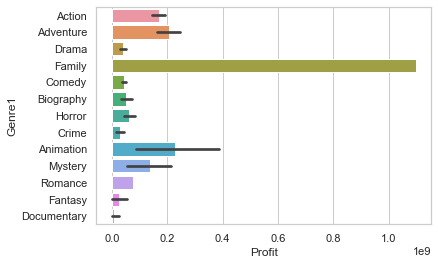

In [51]:
# Barplot for Genre by Avg Profit
sns.barplot(x = 'Profit', y='Genre1',data = final_dataset2)

In [52]:
#final_dataset["Genres"] = final_dataset["Genres"].str.split(",").apply(lambda x: [i.strip() for i in x])
#final_dataset
#final_dataset2['Genre'] = final_dataset2['Genres'].map( lambda x: x[:4])
#final_dataset2

#dfmi.loc[:, ('one', 'second')]

In [53]:
final_dataset2.rename(columns = {'Rating':'IMDB_Rating'},inplace = True)

C:\Users\tjester\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [54]:
final_dataset2 = final_dataset2.drop(['Year_y'], axis=1)

In [55]:
final_dataset2

,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,TMDB_Rating,Vote_Count,Quarter_Num,Year_x,IMDB_Rating,Runtime,Genres,Genre1
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,en,30.579,6.4,8571,2,2011,6.6,136.0,"Action,Adventure,Fantasy",Action
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,en,44.383,7.3,13457,2,2015,7.3,141.0,"Action,Adventure,Sci-Fi",Action
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,en,80.773,8.3,13948,2,2018,8.5,149.0,"Action,Adventure,Sci-Fi",Action
4,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,en,34.953,6.2,7510,4,2017,6.5,120.0,"Action,Adventure,Fantasy",Action
6,Spectre,300000000.0,200074175.0,8.796209e+08,5.796209e+08,en,30.318,6.4,6719,4,2015,6.8,148.0,"Action,Adventure,Thriller",Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,Absentia,70000.0,0.0,8.555000e+03,-6.144500e+04,en,10.357,5.9,175,1,2011,5.8,87.0,"Drama,Horror,Mystery",Drama
2114,The Dirties,55000.0,0.0,0.000000e+00,-5.500000e+04,en,2.971,6.1,57,4,2013,6.8,83.0,"Crime,Drama",Crime
2115,Tiny Furniture,50000.0,391674.0,4.241490e+05,3.741490e+05,en,6.695,5.9,82,4,2010,6.2,98.0,"Comedy,Drama,Romance",Comedy
2119,Krisha,30000.0,144822.0,1.448220e+05,1.148220e+05,en,5.288,6.8,86,1,2016,7.2,83.0,Drama,Drama


In [56]:
final_dataset2.rename(columns = {'Year_x':'Year'},inplace = True)

In [57]:
final_dataset2 = final_dataset2.drop(['Genres'], axis=1)

In [58]:
final_dataset2

,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,TMDB_Rating,Vote_Count,Quarter_Num,Year,IMDB_Rating,Runtime,Genre1
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,en,30.579,6.4,8571,2,2011,6.6,136.0,Action
2,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,en,44.383,7.3,13457,2,2015,7.3,141.0,Action
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,en,80.773,8.3,13948,2,2018,8.5,149.0,Action
4,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,en,34.953,6.2,7510,4,2017,6.5,120.0,Action
6,Spectre,300000000.0,200074175.0,8.796209e+08,5.796209e+08,en,30.318,6.4,6719,4,2015,6.8,148.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,Absentia,70000.0,0.0,8.555000e+03,-6.144500e+04,en,10.357,5.9,175,1,2011,5.8,87.0,Drama
2114,The Dirties,55000.0,0.0,0.000000e+00,-5.500000e+04,en,2.971,6.1,57,4,2013,6.8,83.0,Crime
2115,Tiny Furniture,50000.0,391674.0,4.241490e+05,3.741490e+05,en,6.695,5.9,82,4,2010,6.2,98.0,Comedy
2119,Krisha,30000.0,144822.0,1.448220e+05,1.148220e+05,en,5.288,6.8,86,1,2016,7.2,83.0,Drama


## Final Dataset Visualizations (Trase, Karl, & Al Ameen) 

In [59]:
import numpy as np
avg_profit_by_qtr = final_dataset2.groupby("Quarter_Num")["Profit"].mean()
profit_by_qrt_array = np.array(avg_profit_by_qtr)
profit_by_qrt_array

array([7.93915534e+07, 1.44140263e+08, 8.84100484e+07, 9.53924537e+07])

C:\Users\tjester\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


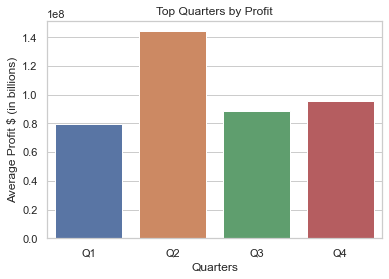

In [60]:
# Created Bar Chart for Top Quarters by Profit 
x1 = ['Q1','Q2','Q3','Q4']
a1 = profit_by_qrt_array

sns.barplot(x1,a1)
plt.title('Top Quarters by Profit')
plt.xlabel('Quarters')
plt.ylabel('Average Profit $ (in billions)')
plt.show()

In [61]:
count_by_qtr = final_dataset2['Quarter_Num'].value_counts()
count_by_qtr
count_by_qtr_array = np.array(count_by_qtr)

C:\Users\tjester\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


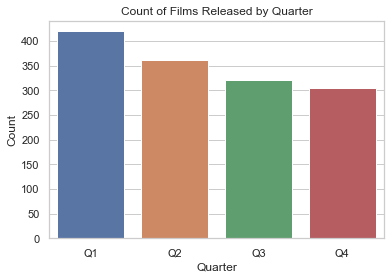

In [62]:
x1 = ['Q1','Q2','Q3','Q4']
a1 = count_by_qtr_array

sns.barplot(x1,a1)
plt.title('Count of Films Released by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.show()

In [63]:
avg_profit_by_genre = final_dataset2.groupby("Genre")["Profit"].mean()
profit_by_genre_array = np.array(avg_profit_by_genre)
profit_by_genre_array

KeyError: 'Genre'

In [64]:
final_dataset2 = final_dataset2.sort_values(by = "Profit",ascending = False)
final_dataset2

,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,TMDB_Rating,Vote_Count,Quarter_Num,Year,IMDB_Rating,Runtime,Genre1
3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,en,80.773,8.3,13948,2,2018,8.5,149.0,Action
26,Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,en,20.709,6.6,14056,2,2015,7.0,124.0,Action
59,Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09,en,20.396,7.3,6538,2,2015,7.2,137.0,Action
20,The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09,en,50.289,7.6,19673,2,2012,8.1,143.0,Action
37,Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,en,2.058,5.1,11,1,2011,7.3,134.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,The Ridiculous 6,60000000.0,0.0,0.000000e+00,-6.000000e+07,en,10.187,5.0,676,4,2015,4.8,119.0,Comedy
228,Monster Trucks,125000000.0,33370166.0,6.164280e+07,-6.335720e+07,en,8.827,5.9,414,1,2017,5.7,104.0,Action
333,The Promise,90000000.0,8224288.0,1.055142e+07,-7.944858e+07,en,10.158,7.1,195,2,2017,6.1,133.0,Drama
336,Bright,90000000.0,0.0,0.000000e+00,-9.000000e+07,en,15.677,6.2,3181,4,2017,6.4,117.0,Action


In [65]:
final_dataset2['Genre'].value_counts()

KeyError: 'Genre'

In [66]:
plt.figure(figsize=(25,10))
sns.barplot(x='Genre', y='Profit', data=final_dataset2)
plt.title('Top Genres by Profit')
plt.xlabel('Genres')
plt.ylabel('Profit $ (in billions)')
plt.show()

ValueError: Could not interpret input 'Genre'

<Figure size 1800x720 with 0 Axes>

## Testing (Al Ameen, Trase, and Karl)

In [67]:
final_dataset2.describe()

,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Popularity,TMDB_Rating,Vote_Count,IMDB_Rating,Runtime
count,1.409000e+03,1.409000e+03,1.409000e+03,1.409000e+03,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000
mean,4.634509e+07,5.882419e+07,1.476204e+08,1.012753e+08,13.113166,6.328176,2131.038325,6.428531,108.523776
std,5.563328e+07,8.521097e+07,2.356821e+08,1.948675e+08,7.577189,0.819095,2830.294559,0.933055,16.768084
min,2.500000e+04,0.000000e+00,0.000000e+00,-1.104502e+08,0.600000,2.100000,5.000000,1.600000,63.000000
25%,1.000000e+07,6.352306e+06,1.430493e+07,-3.968800e+04,8.426000,5.800000,380.000000,5.800000,96.000000
50%,2.500000e+07,3.069800e+07,5.979507e+07,2.803172e+07,11.250000,6.300000,1055.000000,6.500000,106.000000
75%,5.800000e+07,7.139912e+07,1.658891e+08,1.122567e+08,15.762000,6.900000,2703.000000,7.100000,118.000000
max,4.106000e+08,7.000596e+08,2.048134e+09,1.748134e+09,80.773000,8.300000,22186.000000,8.800000,180.000000


In [68]:
pop_mean= final_dataset2.Profit.mean()
pop_std = final_dataset2.Profit.std()

In [69]:
# Selecting a random sample
random_sample = final_dataset2.sample(n=100)
random_sample

,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,TMDB_Rating,Vote_Count,Quarter_Num,Year,IMDB_Rating,Runtime,Genre1
1688,Ain't Them Bodies Saints,5000000.0,391611.0,1075009.0,-3924991.0,en,8.166,6.2,217,3,2013,6.4,96.0,Crime
1370,Stoker,12000000.0,1703125.0,12034913.0,34913.0,en,10.738,6.6,1282,1,2013,6.8,99.0,Drama
1089,You Again,20000000.0,25702053.0,32838945.0,12838945.0,en,10.208,6.2,734,3,2010,5.8,105.0,Comedy
1651,Oculus,5000000.0,27695246.0,44115496.0,39115496.0,en,10.841,6.4,1747,2,2014,6.5,104.0,Horror
862,Baahubali 2: The Conclusion,30000000.0,18985794.0,263502914.0,233502914.0,te,10.406,7.0,252,2,2017,8.3,167.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Ben-Hur,95000000.0,26410477.0,91669648.0,-3330352.0,en,10.110,5.6,1068,3,2016,5.7,123.0,Action
1252,A Most Wanted Man,15000000.0,17237855.0,36068890.0,21068890.0,en,10.267,6.5,784,3,2014,6.8,122.0,Crime
351,RED 2,84000000.0,53262560.0,141507355.0,57507355.0,en,14.994,6.5,2368,3,2013,6.6,116.0,Action
762,Broken City,35000000.0,19701164.0,34480045.0,-519955.0,en,13.646,5.9,814,1,2013,6.2,109.0,Crime


In [70]:
sample_mean = random_sample.Profit.mean()
sample_std = random_sample.Profit.std()
print(sample_mean,sample_std)
print(pop_mean,pop_std)

65545814.56 138227410.05838454
101275270.7459191 194867455.97646457


In [71]:
# H0 = sample_mean = 0
# H1 = sample_mean != 0
"""
import scipy.stats as stats
from math import sqrt 

z = (sample_mean - pop_mean)/(pop_std / (sqrt(100)))
z

area_under = stats.norm.cdf(z)
print(area_under)"""

'\nimport scipy.stats as stats\nfrom math import sqrt \n\nz = (sample_mean - pop_mean)/(pop_std / (sqrt(100)))\nz\n\narea_under = stats.norm.cdf(z)\nprint(area_under)'

In [72]:
final_corr_matrix = final_dataset2.corr
print(final_corr_matrix)

<bound method DataFrame.corr of                       Title  Production_Budget  Domestic_Gross  \
3    Avengers: Infinity War        300000000.0     678815482.0   
26           Jurassic World        215000000.0     652270625.0   
59                Furious 7        190000000.0     353007020.0   
20             The Avengers        225000000.0     623279547.0   
37            Black Panther        200000000.0     700059566.0   
..                      ...                ...             ...   
492        The Ridiculous 6         60000000.0             0.0   
228          Monster Trucks        125000000.0      33370166.0   
333             The Promise         90000000.0       8224288.0   
336                  Bright         90000000.0             0.0   
163         Mars Needs Moms        150000000.0      21392758.0   

     Worldwide_Gross        Profit Original_Language  Popularity  TMDB_Rating  \
3       2.048134e+09  1.748134e+09                en      80.773          8.3   
26      1.648

In [73]:
"""import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(final_corr_matrix, annot=True)
plt.show()"""

'import seaborn as sn\nimport matplotlib.pyplot as plt\n\nsn.heatmap(final_corr_matrix, annot=True)\nplt.show()'

In [74]:
genre_unique = pd.array(final_dataset2.Genre.unique())
genre_unique

AttributeError: 'DataFrame' object has no attribute 'Genre'

In [ ]:
"""import numpy as np
from scipy import stats

a = genre_unique
b = profit_by_genre_array
stats.pointbiserialr(a, b)
np.corrcoef(a, b)"""

## Correlation Coefficient

In [75]:
# Gives the correlation coefficient for quantitative variables
final_dataset2.corr()

,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Popularity,TMDB_Rating,Vote_Count,IMDB_Rating,Runtime
Production_Budget,1.000000,0.712885,0.788139,0.667721,0.569619,0.100893,0.611672,0.146080,0.369955
Domestic_Gross,0.712885,1.000000,0.943091,0.937097,0.546848,0.238997,0.715448,0.272525,0.305603
Worldwide_Gross,0.788139,0.943091,1.000000,0.984440,0.588284,0.226135,0.729845,0.258199,0.320046
Profit,0.667721,0.937097,0.984440,1.000000,0.548877,0.244695,0.708082,0.270574,0.281459
Popularity,0.569619,0.546848,0.588284,0.548877,1.000000,0.308841,0.691446,0.260556,0.318700
TMDB_Rating,0.100893,0.238997,0.226135,0.244695,0.308841,1.000000,0.414737,0.860668,0.405830
Vote_Count,0.611672,0.715448,0.729845,0.708082,0.691446,0.414737,1.000000,0.409811,0.395748
IMDB_Rating,0.146080,0.272525,0.258199,0.270574,0.260556,0.860668,0.409811,1.000000,0.418061
Runtime,0.369955,0.305603,0.320046,0.281459,0.318700,0.405830,0.395748,0.418061,1.000000


In [76]:
# Run T-Test
sample = final_dataset2[final_dataset2['Quarter_Num']=='2']
x_bar_final = sample['Profit'].mean()
mu_final = final_dataset2['Profit'].mean()
sigma_final = sample['Profit'].std()
n_final = len(sample)

print(x_bar_final, mu_final)

144140262.7795031 101275270.7459191


In [77]:
# Our hypothesis

# H0 = xbar <= mu_final
# HA = xbar > mu_final

In [78]:
# 95% test
t_final = (x_bar_final -  mu_final)/(sigma_final/np.sqrt(n_final))
t_final

2.8914676557708696

NameError: name 'stats' is not defined

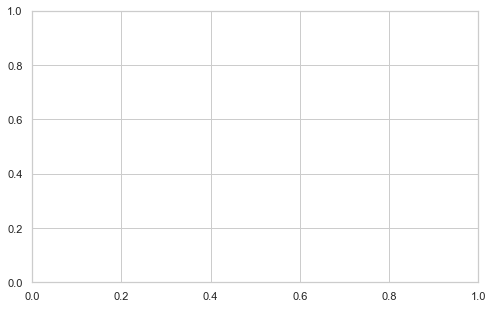

In [79]:
# Set up figure and axes
fig, ax = plt.subplots(figsize=(8,5))

# Generate data for plotting the PDF
# (1) generate points on the x axis between -5 and 5:
x = np.linspace(-5, 5, 200)
# (2) use stats.t.pdf to get values on the probability density
# function for the t-distribution
y = stats.t.pdf(x, final_dataset2, 0, 1)

# Plot the PDF as a line graph
ax.plot(x, y, color='darkblue', label="t-distribution PDF")

# Plot a vertical line for our measured difference in sales t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='observed t-statistic')

ax.legend();

In [80]:
#
stats.t.cdf(t_final, df=(n_final-1))

NameError: name 'stats' is not defined

In [81]:
t_crit = stats.t.ppf(1 - 0.05, df=(n_final-1))
t_crit

NameError: name 'stats' is not defined

In [82]:
#Pushing p
p_value = stats.t.sf(t_final, df = (n_final-1))
p_value

NameError: name 'stats' is not defined

Based on our p-value, we can be confident that 95% of the time the mean of the movies produced in Q2 are significantly greater than the population mean. 

Given our alpha of 0.05, this p-value is smaller than our alpha, therefore we can again say that we reject the null hypothesis at a significance level of 0.05.

## Carolyn, Alameen, and Karl - Runtime vs Profit on Final Dataset

In [4]:
final_dataset2 = pd.read_csv('../../zippedData/final_dataset2.csv')

In [87]:
final_dataset2


,Unnamed: 0,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,TMDB_Rating,Vote_Count,Quarter_Num,Year,IMDB_Rating,Runtime,Genre1,Runtime_bin
0,3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,en,80.773,8.3,13948,2,2018,8.5,149.0,Action,150.0
1,26,Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,en,20.709,6.6,14056,2,2015,7.0,124.0,Action,100.0
2,59,Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09,en,20.396,7.3,6538,2,2015,7.2,137.0,Action,150.0
3,20,The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09,en,50.289,7.6,19673,2,2012,8.1,143.0,Action,150.0
4,37,Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,en,2.058,5.1,11,1,2011,7.3,134.0,Action,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,492,The Ridiculous 6,60000000.0,0.0,0.000000e+00,-6.000000e+07,en,10.187,5.0,676,4,2015,4.8,119.0,Comedy,100.0
1405,228,Monster Trucks,125000000.0,33370166.0,6.164280e+07,-6.335720e+07,en,8.827,5.9,414,1,2017,5.7,104.0,Action,100.0
1406,333,The Promise,90000000.0,8224288.0,1.055142e+07,-7.944858e+07,en,10.158,7.1,195,2,2017,6.1,133.0,Drama,150.0
1407,336,Bright,90000000.0,0.0,0.000000e+00,-9.000000e+07,en,15.677,6.2,3181,4,2017,6.4,117.0,Action,100.0


In [6]:
final_dataset2 = final_dataset2[final_dataset2.Genre1 !='Family']

In [28]:
final_dataset2

,Unnamed: 0,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,TMDB_Rating,Vote_Count,Quarter_Num,Year,IMDB_Rating,Runtime,Genre1,Runtime_bin
0,3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,en,80.773,8.3,13948,2,2018,8.5,149.0,Action,150.0
1,26,Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,en,20.709,6.6,14056,2,2015,7.0,124.0,Action,100.0
2,59,Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09,en,20.396,7.3,6538,2,2015,7.2,137.0,Action,150.0
3,20,The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09,en,50.289,7.6,19673,2,2012,8.1,143.0,Action,150.0
4,37,Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,en,2.058,5.1,11,1,2011,7.3,134.0,Action,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,492,The Ridiculous 6,60000000.0,0.0,0.000000e+00,-6.000000e+07,en,10.187,5.0,676,4,2015,4.8,119.0,Comedy,100.0
1405,228,Monster Trucks,125000000.0,33370166.0,6.164280e+07,-6.335720e+07,en,8.827,5.9,414,1,2017,5.7,104.0,Action,100.0
1406,333,The Promise,90000000.0,8224288.0,1.055142e+07,-7.944858e+07,en,10.158,7.1,195,2,2017,6.1,133.0,Drama,150.0
1407,336,Bright,90000000.0,0.0,0.000000e+00,-9.000000e+07,en,15.677,6.2,3181,4,2017,6.4,117.0,Action,100.0


In [67]:
final_dataset2['Runtime'] = np.round(final_dataset2['Runtime']/50 * 50)

<ipython-input-67-6e1110247739>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset2['Runtime'] = np.round(final_dataset2['Runtime']/50 * 50)


In [68]:
grouped = final_dataset2.groupby('Runtime')['Profit'].mean().reset_index()
grouped

,Runtime,Profit
0,63.0,2.014561e+07
1,75.0,2.982726e+07
2,79.0,9.659960e+05
3,80.0,6.463326e+07
4,81.0,3.597947e+07
...,...,...
85,168.0,8.586489e+07
86,169.0,6.341915e+08
87,172.0,8.198387e+06
88,176.0,-3.393334e+06


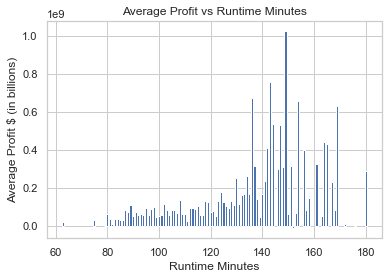

In [88]:
plt.bar(grouped['Runtime'], grouped['Profit'])
plt.xlabel('Runtime Minutes')
plt.ylabel('Average Profit $ (in billions)')
plt.title('Average Profit vs Runtime Minutes')
plt.show()

In [107]:
sixty_to_ninety = final_dataset2[final_dataset2['Runtime'] <= 90 ]
sixty_to_ninety

,Unnamed: 0,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,TMDB_Rating,Vote_Count,Quarter_Num,Year,IMDB_Rating,Runtime,Genre1,Runtime_bin
14,385,Despicable Me 3,75000000.0,264624300.0,1.034728e+09,959727750.0,en,16.407,6.3,4106,2,2017,6.3,89.0,Adventure,100.0
27,382,The Secret Life of Pets,75000000.0,368384330.0,8.867505e+08,811750534.0,en,9.909,6.1,5374,3,2016,6.5,87.0,Adventure,100.0
30,301,Ice Age: Continental Drift,95000000.0,161321843.0,8.797651e+08,784765137.0,en,17.537,6.3,4598,3,2012,6.6,88.0,Adventure,100.0
67,153,Kung Fu Panda 2,150000000.0,165249063.0,6.648375e+08,514837547.0,en,17.363,6.7,3628,2,2011,7.2,90.0,Action,100.0
93,202,Puss in Boots,130000000.0,149260504.0,5.549875e+08,424987477.0,en,9.078,6.3,1422,4,2011,6.6,90.0,Action,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,1273,The Son of No One,15000000.0,30680.0,1.148578e+06,-13851422.0,en,7.586,5.1,156,4,2011,5.1,90.0,Action,100.0
1320,1146,Action Point,19000000.0,5059608.0,5.103675e+06,-13896325.0,en,12.840,5.2,136,2,2018,5.0,85.0,Comedy,100.0
1343,1187,Forsaken,18000000.0,0.0,0.000000e+00,-18000000.0,en,9.472,5.9,161,1,2016,6.3,90.0,Action,100.0
1397,592,Jonah Hex,47000000.0,10547117.0,1.102270e+07,-35977304.0,en,13.467,4.6,708,2,2010,4.7,81.0,Action,100.0


In [108]:
nintey_to_onetwenty = final_dataset2[(final_dataset2['Runtime'] <= 120) & (final_dataset2['Runtime'] > 90) ]
nintey_to_onetwenty

,Unnamed: 0,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,TMDB_Rating,Vote_Count,Quarter_Num,Year,IMDB_Rating,Runtime,Genre1,Runtime_bin
6,142,Frozen,150000000.0,400738009.0,1.272470e+09,1.122470e+09,en,9.678,5.8,987,1,2010,7.5,102.0,Adventure,100.0
8,402,Minions,74000000.0,336045770.0,1.160336e+09,1.086336e+09,en,9.338,6.4,7343,3,2015,6.4,91.0,Adventure,100.0
10,39,Incredibles 2,200000000.0,608581744.0,1.242521e+09,1.042521e+09,en,36.286,7.6,6354,2,2018,7.7,118.0,Action,100.0
17,381,Despicable Me 2,76000000.0,368065385.0,9.752168e+08,8.992168e+08,en,19.014,6.9,7319,3,2013,7.4,98.0,Adventure,100.0
20,315,Jumanji: Welcome to the Jungle,90000000.0,404508916.0,9.644962e+08,8.744962e+08,en,20.395,6.7,7213,4,2017,7.0,119.0,Action,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,617,Foodfight!,45000000.0,0.0,7.370600e+04,-4.492629e+07,en,4.705,2.1,46,2,2013,1.9,91.0,Action,100.0
1403,210,R.I.P.D.,130000000.0,33618855.0,7.907668e+07,-5.092332e+07,en,21.377,5.6,2047,3,2013,5.6,96.0,Action,100.0
1404,492,The Ridiculous 6,60000000.0,0.0,0.000000e+00,-6.000000e+07,en,10.187,5.0,676,4,2015,4.8,119.0,Comedy,100.0
1405,228,Monster Trucks,125000000.0,33370166.0,6.164280e+07,-6.335720e+07,en,8.827,5.9,414,1,2017,5.7,104.0,Action,100.0


In [109]:
onetwenty_to_onefifty = final_dataset2[(final_dataset2['Runtime'] <= 150) & (final_dataset2['Runtime'] > 120) ]
onetwenty_to_onefifty

,Unnamed: 0,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,TMDB_Rating,Vote_Count,Quarter_Num,Year,IMDB_Rating,Runtime,Genre1,Runtime_bin
0,3,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,en,80.773,8.3,13948,2,2018,8.5,149.0,Action,150.0
1,26,Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,en,20.709,6.6,14056,2,2015,7.0,124.0,Action,100.0
2,59,Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09,en,20.396,7.3,6538,2,2015,7.2,137.0,Action,150.0
3,20,The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09,en,50.289,7.6,19673,2,2012,8.1,143.0,Action,150.0
4,37,Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09,en,2.058,5.1,11,1,2011,7.3,134.0,Action,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,694,USS Indianapolis: Men of Courage,40000000.0,0.0,1.663785e+06,-3.833622e+07,en,11.221,5.9,328,1,2017,5.2,128.0,Action,150.0
1399,578,Child 44,50000000.0,1224330.0,8.004221e+06,-4.199578e+07,en,26.386,6.2,903,2,2015,6.5,137.0,Crime,150.0
1400,450,Live by Night,65000000.0,10378555.0,2.177443e+07,-4.322557e+07,en,11.322,6.2,759,4,2016,6.4,129.0,Action,150.0
1402,419,Blackhat,70000000.0,8005980.0,1.966500e+07,-5.033500e+07,en,16.824,5.3,1165,1,2015,5.4,133.0,Action,150.0


In [110]:
onefifty_to_oneeighty = final_dataset2[(final_dataset2['Runtime'] <= 180) & (final_dataset2['Runtime'] > 150) ]
onefifty_to_oneeighty

,Unnamed: 0,Title,Production_Budget,Domestic_Gross,Worldwide_Gross,Profit,Original_Language,Popularity,TMDB_Rating,Vote_Count,Quarter_Num,Year,IMDB_Rating,Runtime,Genre1,Runtime_bin
15,55,Transformers: Dark of the Moon,195000000.0,352390543.0,1.123791e+09,928790543.0,en,5.339,6.1,4961,2,2011,6.2,154.0,Action,150.0
18,28,Transformers: Age of Extinction,210000000.0,245439076.0,1.104039e+09,894039076.0,en,20.961,5.8,4805,2,2014,5.7,165.0,Action,150.0
28,8,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,809439099.0,en,26.220,7.7,13933,3,2012,8.4,164.0,Action,150.0
31,15,The Hobbit: An Unexpected Journey,250000000.0,303003568.0,1.017004e+09,767003568.0,en,26.939,7.2,12076,4,2012,7.9,169.0,Adventure,150.0
35,16,The Hobbit: The Desolation of Smaug,250000000.0,258366855.0,9.603669e+08,710366855.0,en,21.275,7.6,7739,4,2013,7.8,161.0,Adventure,150.0
49,14,Batman v Superman: Dawn of Justice,250000000.0,330360194.0,8.675003e+08,617500281.0,en,28.088,5.8,11991,1,2016,6.5,151.0,Action,150.0
73,112,Interstellar,165000000.0,188017894.0,6.663794e+08,501379375.0,en,28.440,8.2,18597,4,2014,8.6,169.0,Adventure,150.0
97,179,The Revenant,135000000.0,183637894.0,5.329383e+08,397938302.0,en,19.410,7.4,11064,4,2015,8.0,156.0,Action,150.0
102,25,Transformers: The Last Knight,217000000.0,130168683.0,6.028933e+08,385893340.0,en,24.258,6.0,3255,2,2017,5.2,154.0,Action,150.0
117,273,Django Unchained,100000000.0,162805434.0,4.499483e+08,349948323.0,en,21.260,8.0,15725,4,2012,8.4,165.0,Drama,150.0


In [111]:
sixty_to_ninety['Profit'].mean()

57544763.280254774

In [113]:
nintey_to_onetwenty['Profit'].mean()

77664945.10210526

In [114]:
onetwenty_to_onefifty['Profit'].mean()

186111242.73722628

In [115]:
onefifty_to_oneeighty['Profit'].mean()

288405577.1481481

/Users/cisahack/apps/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


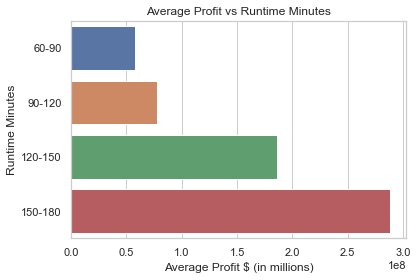

In [120]:
x = [57544763.280254774, 77664945.10210526, 186111242.73722628, 288405577.1481481]
y = ['60-90', '90-120', '120-150', '150-180']

sns.barplot(x,y)
plt.title('Average Profit vs Runtime Minutes')
plt.xlabel('Average Profit $ (in millions)')
plt.ylabel('Runtime Minutes')
plt.show()

In [122]:
sixty_to_ninety.index

Int64Index([  14,   27,   30,   67,   93,   94,  100,  128,  160,  208,
            ...
            1253, 1258, 1271, 1287, 1295, 1319, 1320, 1343, 1397, 1408],
           dtype='int64', length=157)

In [123]:
nintey_to_onetwenty.index

Int64Index([   6,    8,   10,   17,   20,   21,   22,   25,   26,   29,
            ...
            1390, 1391, 1392, 1393, 1395, 1401, 1403, 1404, 1405, 1407],
           dtype='int64', length=950)

In [124]:
onetwenty_to_onefifty.index

Int64Index([   0,    1,    2,    3,    4,    5,    9,   11,   12,   13,
            ...
            1378, 1380, 1381, 1394, 1396, 1398, 1399, 1400, 1402, 1406],
           dtype='int64', length=274)

In [125]:
onefifty_to_oneeighty.index

Int64Index([  15,   18,   28,   31,   35,   49,   73,   97,  102,  117,  150,
             151,  180,  276,  361,  413,  423,  445,  483,  546,  698,  795,
            1088, 1170, 1304, 1306, 1360],
           dtype='int64')